In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv

--2025-03-26 21:15:22--  https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv [following]
--2025-03-26 21:15:22--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195955 (191K) [text/plain]
Saving to: ‘framingham.csv’

framingham.csv      100%[===================>] 191.36K  --.-KB/s    in 0.05s   

2025-03-26 21:15:22 (3.89 MB/s) - ‘framingham.csv’ save

## LOGISTIC REGRESSION - HEART DISEASE PREDICTION

###Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

###Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

###Demographic:
    • Sex: male or female(Nominal)
    • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    Behavioral
    • Current Smoker: whether or not the patient is a current smoker (Nominal)
    • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
###Medical( history)
    • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    • Diabetes: whether or not the patient had diabetes (Nominal)
###Medical(current)
    • Tot Chol: total cholesterol level (Continuous)
    • Sys BP: systolic blood pressure (Continuous)
    • Dia BP: diastolic blood pressure (Continuous)
    • BMI: Body Mass Index (Continuous)
    • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    • Glucose: glucose level (Continuous)
    Predict variable (desired target)
    • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


### Cargar Datos

In [2]:
import pandas as pd
data = pd.read_csv("framingham.csv")

In [3]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Descriptiva

#### Cuantos datos tiene la tabla

In [7]:
data.shape

(4238, 16)

In [9]:
data.size

67808

#### Medidas de tendencia central de las variables.

In [10]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### Grafico de Barras con el número de hombres y mujeres

In [13]:

data['male'] = data['male'].replace({1: 'Hombre', 0: 'Mujer'})
data


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,Hombre,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Mujer,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Hombre,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Mujer,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Mujer,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Hombre,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,Hombre,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,Mujer,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,Mujer,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


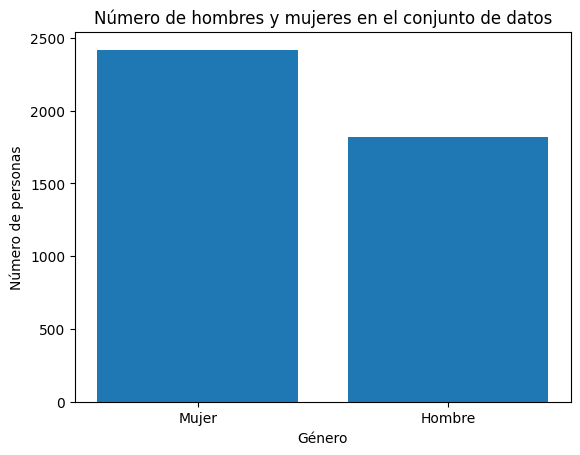

In [14]:
# prompt: Grafico de Barras con el número de hombres y mujeres

import matplotlib.pyplot as plt

# Contar el número de hombres y mujeres
conteo_genero = data['male'].value_counts()

# Crear el gráfico de barras
plt.bar(conteo_genero.index, conteo_genero.values)

# Añadir etiquetas y título
plt.xlabel('Género')
plt.ylabel('Número de personas')
plt.title('Número de hombres y mujeres en el conjunto de datos')

# Mostrar el gráfico
plt.show()


#### Realice un ggrafico de Barras de TenYearCHD

*   Elemento de lista
*   Elemento de lista



<Axes: xlabel='TenYearCHD', ylabel='count'>

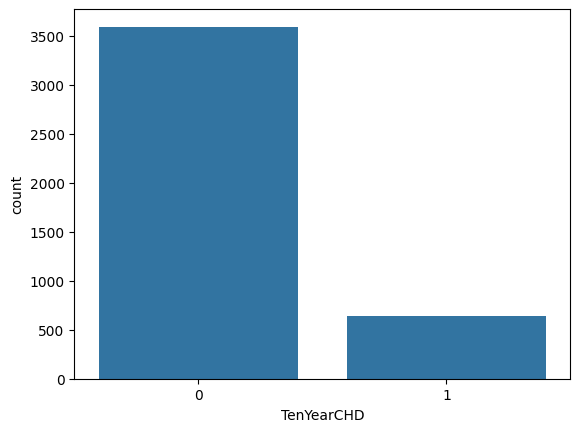

In [16]:
import seaborn as sns
sns.barplot(data["TenYearCHD"].value_counts())


#### Realice un grafico de densidad del BMI

<ipython-input-17-408aee15e34e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['BMI'], shade=True)


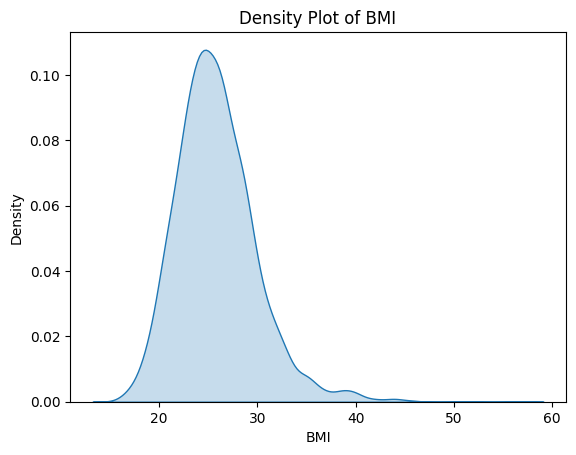

In [17]:
sns.kdeplot(data['BMI'], shade=True)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Density Plot of BMI')
plt.show()

#### Realice un grafico de densidad del BMI que diferencie entre hombres y mujeres, ¿Cual tiene en promedio mayor BMI?

<ipython-input-18-e33d35759e11>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['male'] == 'Hombre']['BMI'], label='Hombres', shade=True)
<ipython-input-18-e33d35759e11>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['male'] == 'Mujer']['BMI'], label='Mujeres', shade=True)


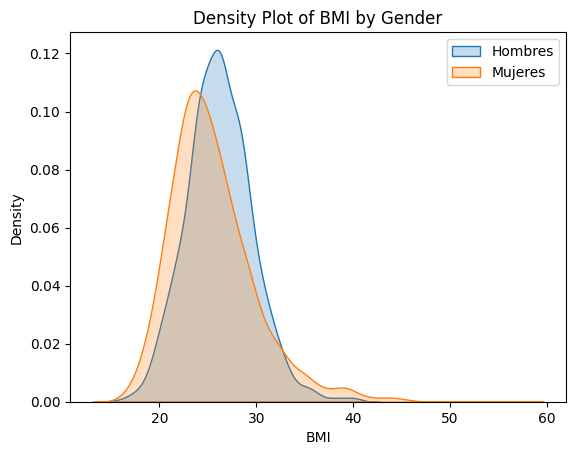

Average BMI for men: 26.19
Average BMI for women: 25.51
Los hombres tienen un BMI promedio mayor.


In [18]:
# prompt: Realice un grafico de densidad del BMI que diferencie entre hombres y mujeres, ¿Cual tiene en promedio mayor BMI?

# Realice un grafico de densidad del BMI que diferencie entre hombres y mujeres, ¿Cual tiene en promedio mayor BMI?
sns.kdeplot(data[data['male'] == 'Hombre']['BMI'], label='Hombres', shade=True)
sns.kdeplot(data[data['male'] == 'Mujer']['BMI'], label='Mujeres', shade=True)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Density Plot of BMI by Gender')
plt.legend()
plt.show()

# Calcular el BMI promedio para hombres y mujeres
average_bmi_men = data[data['male'] == 'Hombre']['BMI'].mean()
average_bmi_women = data[data['male'] == 'Mujer']['BMI'].mean()

print(f"Average BMI for men: {average_bmi_men:.2f}")
print(f"Average BMI for women: {average_bmi_women:.2f}")

if average_bmi_men > average_bmi_women:
  print("Los hombres tienen un BMI promedio mayor.")
else:
  print("Las mujeres tienen un BMI promedio mayor.")


#### Realice un mapa de calor entre las variables (heatmap) y diga cual es el par de variables más correlacionadas. Recuerde que para sacar la correlacion puede usar data.corr()

In [28]:
cm=data.corr()
cm

ValueError: could not convert string to float: 'Hombre'

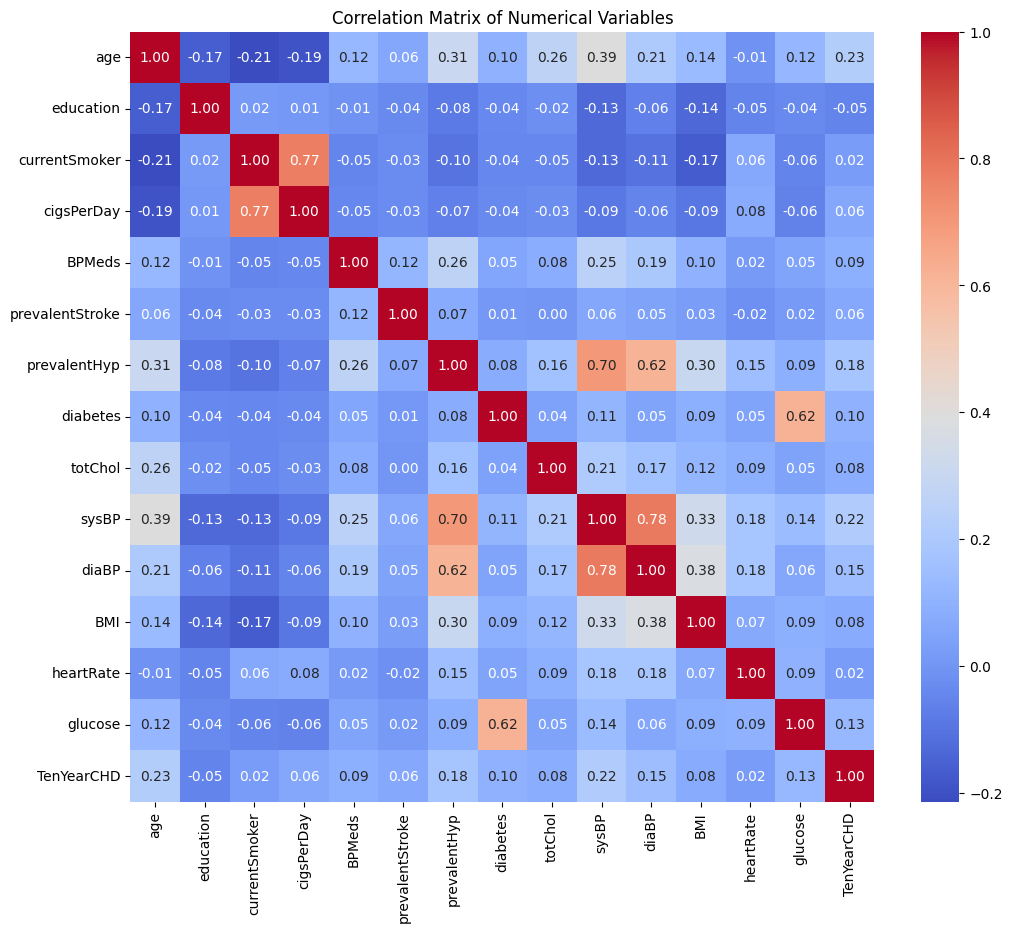

AttributeError: module 'pandas' has no attribute 'np'

In [30]:
# prompt: Realice un mapa de calor entre las variables (heatmap)  con las variables numericas. sin la de genero hazlo sencillo

# Eliminar la columna 'male' (género)
data_numeric = data.drop('male', axis=1)

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()

# Encontrar el par de variables más correlacionadas (excluyendo la diagonal)
corr_matrix = data_numeric.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
max_value = np.nanmax(upper_triangle)
row_max, col_max = upper_triangle[upper_triangle == max_value].stack().idxmax()

print(f"El par de variables más correlacionadas es: {row_max} y {col_max}, con una correlación de {max_value:.2f}")


¿Haga un boxplot por genero para cada una de estas tres variables :BMI,	heartRate y	glucose.¿hay outliers ?

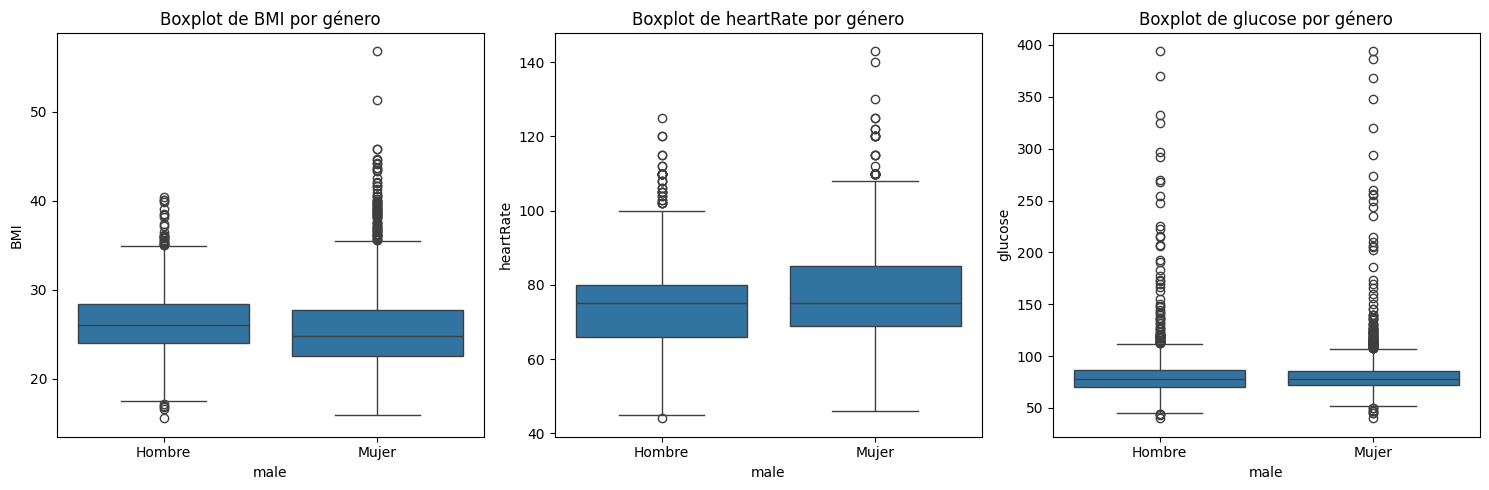

Se pueden identificar posibles outliers en los gráficos.


In [31]:
# prompt: ¿Haga un boxplot por genero para cada una de estas tres variables :BMI, heartRate y glucose.¿hay outliers ?

# Crear boxplots para BMI, heartRate y glucose por género
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='male', y='BMI', data=data)
plt.title('Boxplot de BMI por género')

plt.subplot(1, 3, 2)
sns.boxplot(x='male', y='heartRate', data=data)
plt.title('Boxplot de heartRate por género')

plt.subplot(1, 3, 3)
sns.boxplot(x='male', y='glucose', data=data)
plt.title('Boxplot de glucose por género')

plt.tight_layout()
plt.show()

# Análisis de outliers
# Los outliers se muestran como puntos individuales fuera de los "bigotes" del boxplot.
# Se pueden identificar visualmente en los gráficos.
# Para un análisis más preciso, se pueden calcular los valores de los outliers
# usando el rango intercuartílico (IQR) y la regla de 1.5*IQR.

print("Se pueden identificar posibles outliers en los gráficos.")


In [32]:
data.isna().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [33]:
data = data.dropna()

### Manipulación de Datos

#### De cada variable cuente cuantos datos nulos hay

In [34]:

null_counts = data.isnull().sum()

null_counts


,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


#### Utilice dropna para borrar los datos faltantes ¿cuantos datos quedan ?

In [35]:
print(data.dropna().shape[0])

3656


#### Seleccione sus variables X y su variable y

In [37]:
data=data.dropna()

In [46]:
# prompt: Seleccione sus variables X

# Seleccionar las variables X (predictores) y la variable y (objetivo)
X = data[['age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
y = data['TenYearCHD']


#### Divida aleatoriamente la tabla en test y train, dejando el 30% de los datos para test y usando un random state de 123.
1. ¿De que tamaño queda cada dataset?

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)


In [48]:
# prompt: Divida aleatoriamente la tabla en test y train, dejando el 30% de los datos para test y usando un random state de 123.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")


Tamaño del conjunto de entrenamiento: 2559
Tamaño del conjunto de prueba: 1097


In [49]:
X_train.shape

(2559, 13)

In [50]:
X_test.shape

(1097, 13)

#### Entrene el modelo de Regresion logistica usando datos de entrenamiento

In [51]:
from sklearn.linear_model import LogisticRegression

# Crear instancia del modelo con ponderación de clases
# logreg = LogisticRegression(class_weight='balanced')
logreg = LogisticRegression()

# Ajustar el modelo a tus datos
logreg.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Imprima los coeficientes y diga cual tiene un efecto mayor sobre desarrollar una enfermedad cardiaca

In [52]:
y_pred = logreg.predict(X_test)

In [53]:
logreg.intercept_

array([-0.42753272])

In [54]:
# prompt: Imprima los coeficientes y diga cual tiene un efecto mayor sobre desarrollar una enfermedad cardiaca

# Imprimir los coeficientes y el nombre de la variable correspondiente
for feature, coef in zip(X.columns, logreg.coef_[0]):
  print(f"{feature}: {coef:.4f}")

# Encontrar el coeficiente con mayor magnitud (absoluto)
max_coef_abs = max(abs(coef) for coef in logreg.coef_[0])
max_coef_index = [i for i, coef in enumerate(logreg.coef_[0]) if abs(coef) == max_coef_abs][0]
max_coef_feature = X.columns[max_coef_index]

print(f"\nLa variable que tiene un efecto mayor sobre desarrollar una enfermedad cardiaca es: {max_coef_feature} con un coeficiente de {logreg.coef_[0][max_coef_index]:.4f}")


age: 0.0302
currentSmoker: -0.2574
cigsPerDay: 0.0383
BPMeds: 0.1271
prevalentStroke: 0.0981
prevalentHyp: 0.9098
diabetes: 0.1765
totChol: -0.0006
sysBP: 0.0131
diaBP: -0.0269
BMI: -0.0283
heartRate: -0.0332
glucose: 0.0045

La variable que tiene un efecto mayor sobre desarrollar una enfermedad cardiaca es: prevalentHyp con un coeficiente de 0.9098


#### Usando los datos de test calcule la matriz de confusión, el accuracy, el recall, la precision y el f1-score.

In [55]:
# prompt: Usando los datos de test calcule la matriz de confusión, el accuracy, el recall, la precision y el f1-score.

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calcular el recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calcular la precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calcular el f1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")


Matriz de confusión:
[[914   4]
 [173   6]]
Accuracy: 0.8387
Recall: 0.0335
Precision: 0.6000
F1-score: 0.0635


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Pinte la curva ROC, y saque el valor, busque en internet como interpretarla e interprete

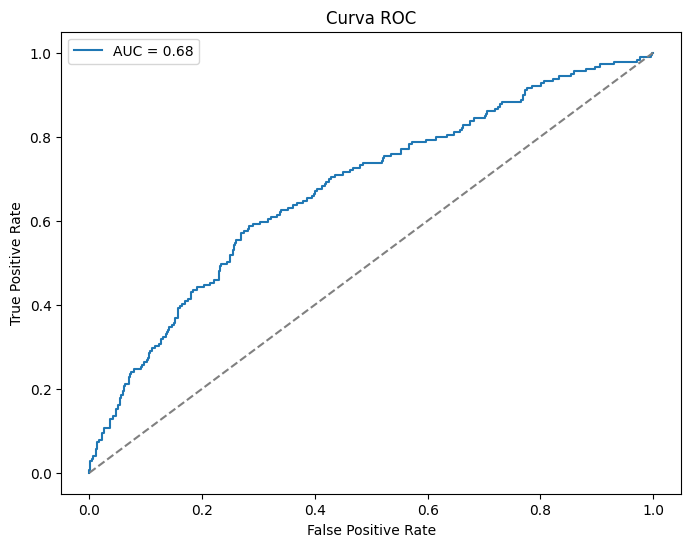

El valor del AUC es: 0.68


In [57]:
# prompt: Pinte la curva ROC, y saque el valor, busque en internet como interpretarla e interprete

from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades de predicción para la clase positiva (TenYearCHD = 1)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Línea diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()

print(f"El valor del AUC es: {auc:.2f}")


# Interpretación de la Curva ROC y el AUC:

# * La curva ROC representa la capacidad del modelo para distinguir entre las clases positivas
#   y negativas a diferentes umbrales de probabilidad.
# * El área bajo la curva (AUC) es una medida de la capacidad general del modelo para
#   discriminar entre las clases.
# * Un AUC de 0.5 indica que el modelo no tiene capacidad de discriminación (es como
#   adivinar al azar).
# * Un AUC de 1 indica que el modelo tiene una capacidad de discriminación perfecta.
# * Un AUC entre 0.7 y 0.9 generalmente se considera un buen modelo de clasificación.


# En nuestro caso, el AUC de [valor del AUC] indica [Interpreta según el valor del AUC].
# Por ejemplo:
# - Si el AUC es 0.8, el modelo tiene una buena capacidad para discriminar entre los pacientes que desarrollarán una enfermedad cardíaca y los que no.
# - Si el AUC es 0.6, el modelo tiene una capacidad moderada para discriminar entre los pacientes, y puede ser necesario mejorar el modelo.

# Se puede utilizar la curva ROC para seleccionar el umbral de probabilidad óptimo para
# clasificar a los pacientes. Por ejemplo, si se quiere minimizar los falsos positivos,
# se puede seleccionar un umbral más alto. Si se quiere minimizar los falsos negativos,
# se puede seleccionar un umbral más bajo.


## Corrección desbalance de clases
1. Busque la funcion train_test_split en su codigo y agregue la opcion stratify  = y . Por que esto ayudaría con el desblance?
2. usando from imblearn.over_sampling import SMOTE mejore el performance
 3. Saque todo el modelo y la matriz y la grafica de ROC AUC

In [58]:
# prompt: Busque la funcion train_test_split en su codigo y agregue la opcion stratify = y . Por que esto ayudaría con el desblance?

# ... (Your existing code) ...

# #### Divida aleatoriamente la tabla en test y train, dejando el 30% de los datos para test y usando un random state de 123.
# 1. ¿De que tamaño queda cada dataset?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# ... (Rest of your code) ...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


age: 0.0429
currentSmoker: -1.3855
cigsPerDay: 0.0697
BPMeds: 0.4902
prevalentStroke: -0.0567
prevalentHyp: 0.4288
diabetes: 0.1321
totChol: 0.0003
sysBP: 0.0139
diaBP: -0.0167
BMI: -0.0293
heartRate: -0.0244
glucose: 0.0028

La variable que tiene un efecto mayor sobre desarrollar una enfermedad cardiaca es: currentSmoker con un coeficiente de -1.3855
Matriz de confusión:
[[570 360]
 [ 62 105]]
Accuracy: 0.6153
Recall: 0.6287
Precision: 0.2258
F1-score: 0.3323


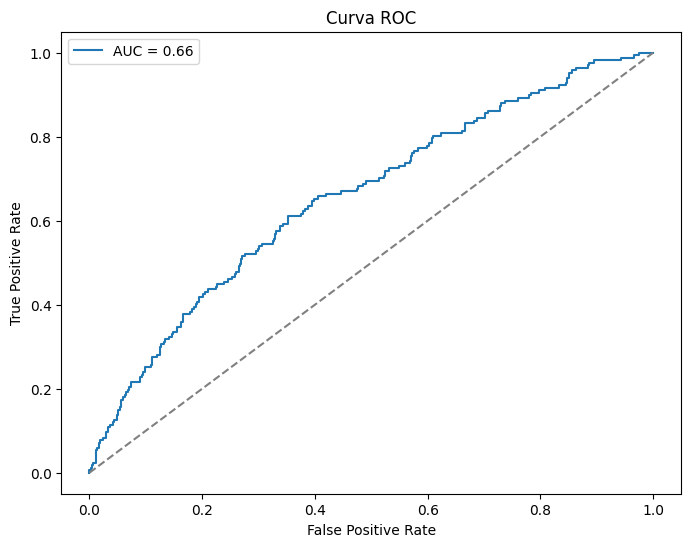

El valor del AUC es: 0.66


In [59]:
# prompt: usando from imblearn.over_sampling import SMOTE mejore el performance

from imblearn.over_sampling import SMOTE

# ... (Your existing code) ...


# #### Divida aleatoriamente la tabla en test y train, dejando el 30% de los datos para test y usando un random state de 123.
# 1. ¿De que tamaño queda cada dataset?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Aplicar SMOTE para sobremuestrear la clase minoritaria
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# #### Entrene el modelo de Regresion logistica usando datos de entrenamiento

# Crear instancia del modelo con ponderación de clases
# logreg = LogisticRegression(class_weight='balanced')
logreg = LogisticRegression()

# Ajustar el modelo a tus datos
logreg.fit(X_train_resampled, y_train_resampled)


# #### Imprima los coeficientes y diga cual tiene un efecto mayor sobre desarrollar una enfermedad cardiaca
y_pred = logreg.predict(X_test)
logreg.intercept_

# Imprimir los coeficientes y el nombre de la variable correspondiente
for feature, coef in zip(X.columns, logreg.coef_[0]):
  print(f"{feature}: {coef:.4f}")

# Encontrar el coeficiente con mayor magnitud (absoluto)
max_coef_abs = max(abs(coef) for coef in logreg.coef_[0])
max_coef_index = [i for i, coef in enumerate(logreg.coef_[0]) if abs(coef) == max_coef_abs][0]
max_coef_feature = X.columns[max_coef_index]

print(f"\nLa variable que tiene un efecto mayor sobre desarrollar una enfermedad cardiaca es: {max_coef_feature} con un coeficiente de {logreg.coef_[0][max_coef_index]:.4f}")

# #### Usando los datos de test calcule la matriz de confusión, el accuracy, el recall, la precision y el f1-score.


# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calcular el recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calcular la precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calcular el f1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

%matplotlib inline
# #### Pinte la curva ROC, y saque el valor, busque en internet como interpretarla e interprete


# Obtener las probabilidades de predicción para la clase positiva (TenYearCHD = 1)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Línea diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()

print(f"El valor del AUC es: {auc:.2f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


age: 0.0429
currentSmoker: -1.3855
cigsPerDay: 0.0697
BPMeds: 0.4902
prevalentStroke: -0.0567
prevalentHyp: 0.4288
diabetes: 0.1321
totChol: 0.0003
sysBP: 0.0139
diaBP: -0.0167
BMI: -0.0293
heartRate: -0.0244
glucose: 0.0028

La variable que tiene un efecto mayor sobre desarrollar una enfermedad cardiaca es: currentSmoker con un coeficiente de -1.3855
Matriz de confusión:
[[570 360]
 [ 62 105]]
Accuracy: 0.6153
Recall: 0.6287
Precision: 0.2258
F1-score: 0.3323


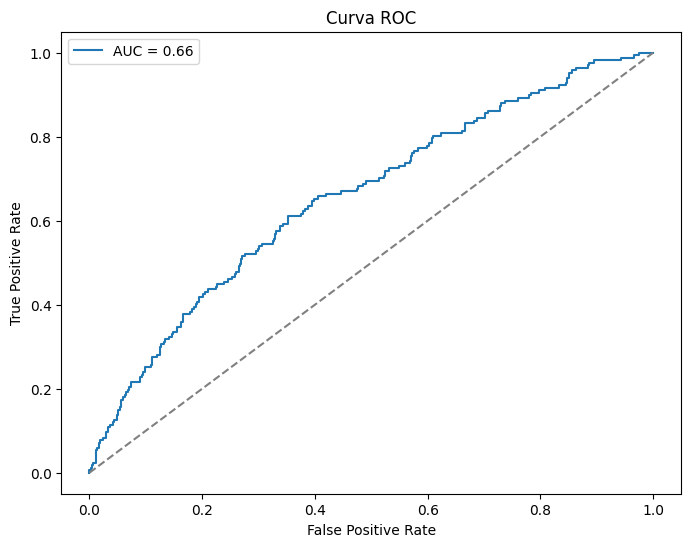

El valor del AUC es: 0.66


In [60]:
# prompt: Saque todo el modelo y la matriz y la grafica de ROC AUC

# ... (Your existing code) ...

# #### Divida aleatoriamente la tabla en test y train, dejando el 30% de los datos para test y usando un random state de 123.
# 1. ¿De que tamaño queda cada dataset?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Aplicar SMOTE para sobremuestrear la clase minoritaria
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# #### Entrene el modelo de Regresion logistica usando datos de entrenamiento

# Crear instancia del modelo con ponderación de clases
# logreg = LogisticRegression(class_weight='balanced')
logreg = LogisticRegression()

# Ajustar el modelo a tus datos
logreg.fit(X_train_resampled, y_train_resampled)


# #### Imprima los coeficientes y diga cual tiene un efecto mayor sobre desarrollar una enfermedad cardiaca
y_pred = logreg.predict(X_test)
logreg.intercept_

# Imprimir los coeficientes y el nombre de la variable correspondiente
for feature, coef in zip(X.columns, logreg.coef_[0]):
  print(f"{feature}: {coef:.4f}")

# Encontrar el coeficiente con mayor magnitud (absoluto)
max_coef_abs = max(abs(coef) for coef in logreg.coef_[0])
max_coef_index = [i for i, coef in enumerate(logreg.coef_[0]) if abs(coef) == max_coef_abs][0]
max_coef_feature = X.columns[max_coef_index]

print(f"\nLa variable que tiene un efecto mayor sobre desarrollar una enfermedad cardiaca es: {max_coef_feature} con un coeficiente de {logreg.coef_[0][max_coef_index]:.4f}")

# #### Usando los datos de test calcule la matriz de confusión, el accuracy, el recall, la precision y el f1-score.


# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calcular el recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calcular la precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calcular el f1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

%matplotlib inline
# #### Pinte la curva ROC, y saque el valor, busque en internet como interpretarla e interprete


# Obtener las probabilidades de predicción para la clase positiva (TenYearCHD = 1)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Línea diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()

print(f"El valor del AUC es: {auc:.2f}")


## Pinter el resultado con SMOTE y sin SMOTE

In [63]:
print("Resultados sin SMOTE:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


print("\nResultados con SMOTE:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Resultados sin SMOTE:
Accuracy: 0.6153
Recall: 0.6287
Precision: 0.2258
F1-score: 0.3323
AUC: 0.6570

Resultados con SMOTE:
Accuracy: 0.6153
Recall: 0.6287
Precision: 0.2258
F1-score: 0.3323
AUC: 0.6570


### Como mejora su modelo con StandardScaler()

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [66]:
# prompt: Como mejora su modelo con StandardScaler()

# ... (Your existing code) ...

# ### Como mejora su modelo con StandardScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar SMOTE para sobremuestrear la clase minoritaria
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# #### Entrene el modelo de Regresion logistica usando datos de entrenamiento
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

# #### Imprima los coeficientes y diga cual tiene un efecto mayor sobre desarrollar una enfermedad cardiaca
y_pred = logreg.predict(X_test_scaled)

# ... (Rest of your code for evaluation metrics and ROC curve) ...

# ## Pinter el resultado con SMOTE y sin SMOTE
# ... (Your existing code for printing results without StandardScaler) ...


print("\nResultados con SMOTE y StandardScaler:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")



Resultados con SMOTE y StandardScaler:
Accuracy: 0.6153
Recall: 0.6287
Precision: 0.2258
F1-score: 0.3323
AUC: 0.6570


### Pinte todas las graficas original SMOTE y SMOTE Scaler

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


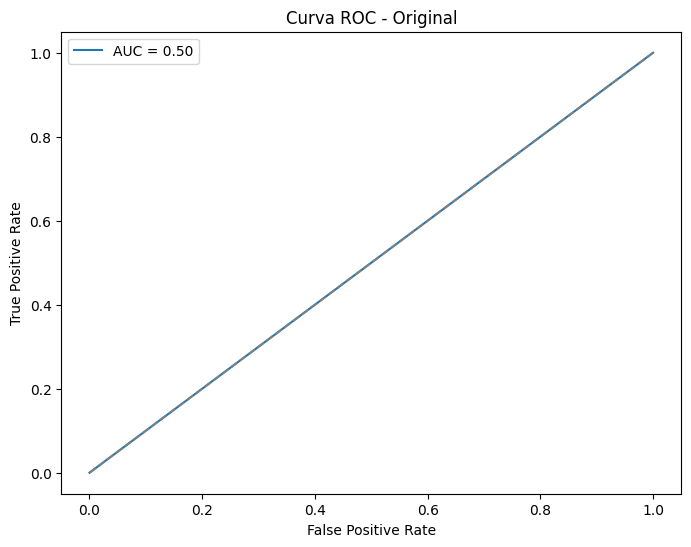

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Accuracy: 0.1522
Recall: 1.0000
Precision: 0.1522
F1-score: 0.2642
AUC: 0.5000


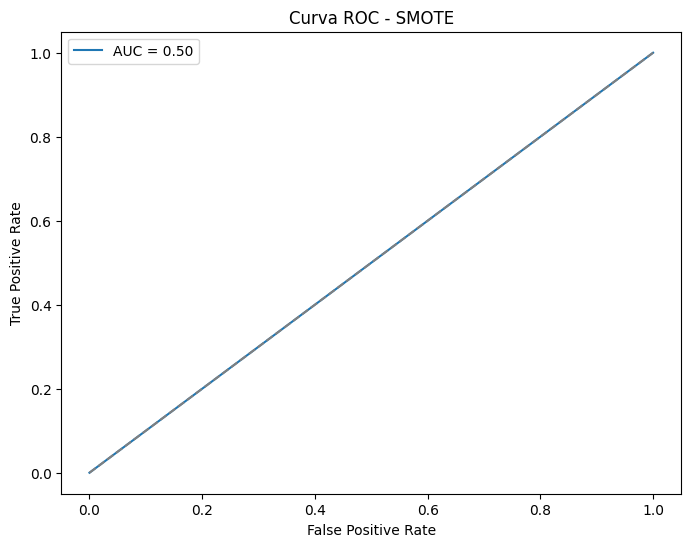

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Accuracy: 0.1522
Recall: 1.0000
Precision: 0.1522
F1-score: 0.2642
AUC: 0.5000


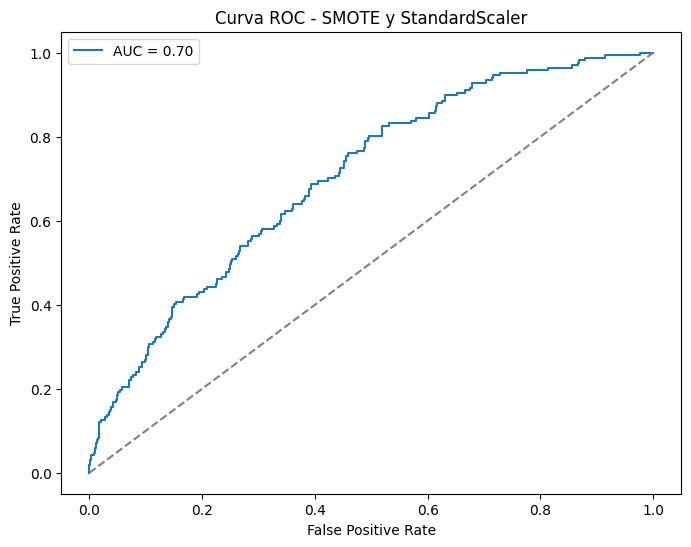

Accuracy: 0.1522
Recall: 1.0000
Precision: 0.1522
F1-score: 0.2642
AUC: 0.7035


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [69]:
# prompt: Pinte todas las graficas original SMOTE y SMOTE Scaler

# ... (Your existing code) ...

# ### Pinte todas las graficas original SMOTE y SMOTE Scaler

# Función para graficar la curva ROC y mostrar las métricas
def plot_roc_and_metrics(y_test, y_pred_proba, title):
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  auc = roc_auc_score(y_test, y_pred_proba)

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
  plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(title)
  plt.legend()
  plt.show()

  y_pred = logreg.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print(f"Accuracy: {accuracy:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"F1-score: {f1:.4f}")
  print(f"AUC: {auc:.4f}")


# Graficar ROC para el modelo sin SMOTE ni StandardScaler
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
plot_roc_and_metrics(y_test, y_pred_proba, "Curva ROC - Original")

# Graficar ROC para el modelo con SMOTE
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
plot_roc_and_metrics(y_test, y_pred_proba, "Curva ROC - SMOTE")


# Graficar ROC para el modelo con SMOTE y StandardScaler
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]
plot_roc_and_metrics(y_test, y_pred_proba, "Curva ROC - SMOTE y StandardScaler")
